In [1]:
import owlready2 as owlr
import pandas as pd
from rdflib import URIRef, Literal, Graph
from rdflib.namespace import RDF, RDFS
from rdflib import Namespace
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph

from collections import Counter
import uuid

from datetime import datetime, timezone

import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from IPython.core.display import HTML

import loader

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()

    display(Image(png))

def t2rdflibg(triples): #triples to rdflib graph
    g = Graph()
    for t in triples:
        g.add(t)
    return g

import networkx as nx



* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [2]:
retrieve_facts_sparql = """
SELECT ?s ?p ?o
WHERE 

{
    {
        ?r dm:FactPredicate ?p .
        ?r dm:FactSubject ?s .
        ?r dm:FactObject ?o .
    }
    
}
"""


data_load_objects_sparql = """
SELECT ?s ?p ?o
WHERE 

{
    {
        ?s a ?loadClasses .
        BIND (dm:MemberOf as ?m)
        BIND (dm:Contains as ?p)
        VALUES ?loadClasses { dm:JobNode dm:BatchNode}
        ?o ?m ?s .
    }
    UNION
    {
        ?s a ?loadClasses .
        BIND (dm:MemberOf as ?m)
        BIND (rdfs:label as ?p)
        VALUES ?loadClasses { dm:JobNode dm:BatchNode dm:RowNode}
        ?q ?m ?s .
        ?s ?p ?o .
    }
    
}
"""

retrieve_reconciliation_sparql = """
        SELECT distinct ?b ?j ?r ?f ?s ?p ?o ?sl ?ol
        
        WHERE
        
        {
        
            ?b a dm:BatchNode .
            ?b dm:Contains ?j .
            ?j dm:Contains ?r .
            ?r dm:Contains ?f .
            ?f dm:FactSubject ?s . 
            ?f dm:FactPredicate ?p .
            ?f dm:FactObject ?o.
            ?s dm:UniqueIdentifier ?sl .
            ?o dm:UniqueIdentifier ?ol .
            
            
            

        }


"""

In [3]:
onto = owlr.get_ontology("datamodels_rdf.owl").load()

* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Contains belongs to more than one entity types: [owl.ObjectProperty, owl.ObjectProperty, owl.ObjectProperty, datamodels_rdf.MetaProperty]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#MemberOf belongs to more than one entity types: [owl.ObjectProperty, owl.ObjectProperty, owl.ObjectProperty, datamodels_rdf.MetaProperty]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#FromAttribute belongs to more than one entity types: [owl.ObjectProperty, datamodels_rdf.MetaClass, datamodels_rdf.RelationshipLinkage]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#FromClass belongs to more than one entity types: [owl.ObjectProperty, datamodels_rdf.MetaClass, datamodels_rdf.Relationsh

In [4]:
def flush(onto):
    for m in onto.Serialization.instances()[0].Contains:
        print(m, m.is_a)
flush(onto)
owlr.sync_reasoner(onto)

* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit:/usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////var/folders/rd/q3bhk6_n56x75m05pp2sq7dr0000gn/T/tmpodjhpp7s


datamodels_rdf.Mapping_Attribute [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_AttributeHasDataType [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Class [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ClassContainsAttribute [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Context [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ContextContainsClass [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ContextContainsSubContext [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_DomainContainsModel [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Model [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelContainsClass [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelContainsContext [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelDomain [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelHasModelType [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_SubContext [datamodels_rdf.Mapping]


* Owlready2 * HermiT took 0.6215310096740723 seconds
* Owlready * Reparenting datamodels_rdf.FactPredicate: {owl.ObjectProperty, datamodels_rdf.Contains} => {datamodels_rdf.Contains}
* Owlready * Reparenting datamodels_rdf.FactObject: {owl.ObjectProperty, datamodels_rdf.Contains} => {datamodels_rdf.Contains}
* Owlready * Reparenting datamodels_rdf.FactSubject: {owl.ObjectProperty, datamodels_rdf.Contains} => {datamodels_rdf.Contains}
* Owlready * Reparenting datamodels_rdf.ToClass: {datamodels_rdf.RelationshipLinkage, owl.ObjectProperty} => {datamodels_rdf.RelationshipLinkage, datamodels_rdf.MetaClass}
* Owlready * Reparenting datamodels_rdf.ToAttribute: {datamodels_rdf.RelationshipLinkage, owl.ObjectProperty} => {datamodels_rdf.RelationshipLinkage, datamodels_rdf.MetaClass}
* Owlready * Reparenting datamodels_rdf.FromOptionality: {datamodels_rdf.RelationshipLinkage, owl.ObjectProperty} => {datamodels_rdf.RelationshipLinkage}
* Owlready * Reparenting datamodels_rdf.FromClass: {datamode

In [5]:
serial_key = { "Business Domain" : "ModelDomain", 
             "Model" : "Model", 
             "ModelType" : "ModelType", 
             "Entity" : "Class", 
             "Attribute" : "Attribute", 
             "DataType" : "DataType", 
             "Context" : "Context", 
             "SubContext" : "SubContext"}



In [6]:
test = Graph()
test.parse ("datamodels_rdf.owl", format='xml')
dmns = Namespace(onto.base_iri)
test.bind('dm', dmns, override=True, replace=True)
test.bind('rdfs', RDFS)
namespace_d = {'dm': dmns, 'rdfs' : RDFS, 'rdf' : RDF}

def nan2None(value):
    if pd.isnull(value) :
        return None
    else:
        return value


def get_data_rows(filename):
    data_rows_df = pd.read_csv(filename)
    data_rows=[]
    for i,r in data_rows_df.iterrows():
        r_d = {k:nan2None(v) for k,v in dict(r).items()}

        data_rows.append(r_d)
    del data_rows_df
    return data_rows



In [7]:
batch_manifest = { onto.EntityAttributeRecord : get_data_rows("model_entities.csv")}

In [8]:
test = loader.load_data(onto, 
                        batch_manifest=batch_manifest, 
                        rdflib_graph=test, 
                        serial_key=serial_key)



[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/eb6d370fb90f416cb18d005dfb6386de'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Attribute')]
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/eb6d370fb90f416cb18d005dfb6386de'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('PersonID')]
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/6f0d72275d84400ba7d63fe229495d8f'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Class')]
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/6f0d72275d84400ba7d63fe229495d8f'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('Person')]
[rdflib.term.URIRef('http://www.semanticweb.org/tomk

yes True
(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/5686c34484ff4e26bdf30b31961ad9cc'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#UniqueIdentifier'), rdflib.term.Literal('Core.Principal Interactions.Insurance Policy'))
yes True
(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/d129c59678ca40319865f8893c55c768'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#UniqueIdentifier'), rdflib.term.Literal('Core.Principal Interactions'))
yes True
(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/3bfea7fb51a34720b0d028be1d4571a8'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#UniqueIdentifier'), rdflib.term.Literal('Core'))
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/9b7808adc2f14c80a1b6f69244f87dcc'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http

mastered reified counts 288 288
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not h

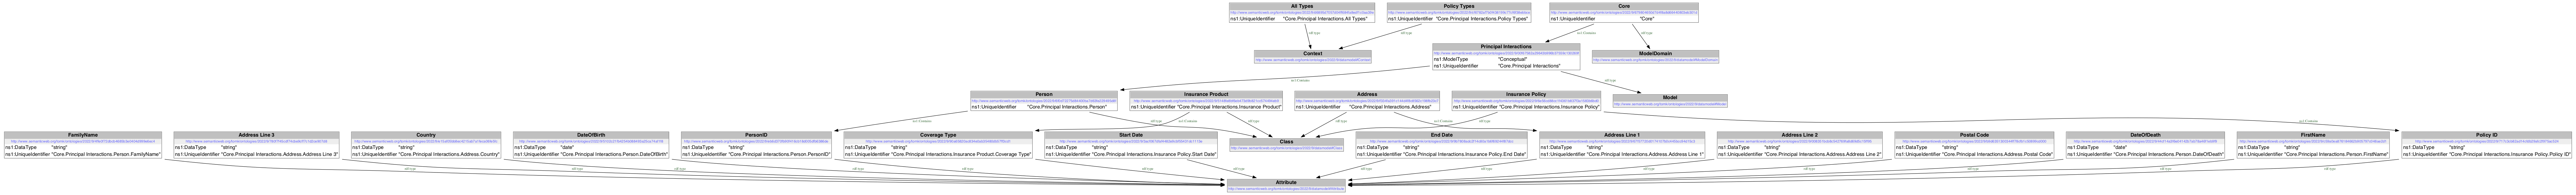

In [9]:
visualize(t2rdflibg(test.query(retrieve_facts_sparql)))

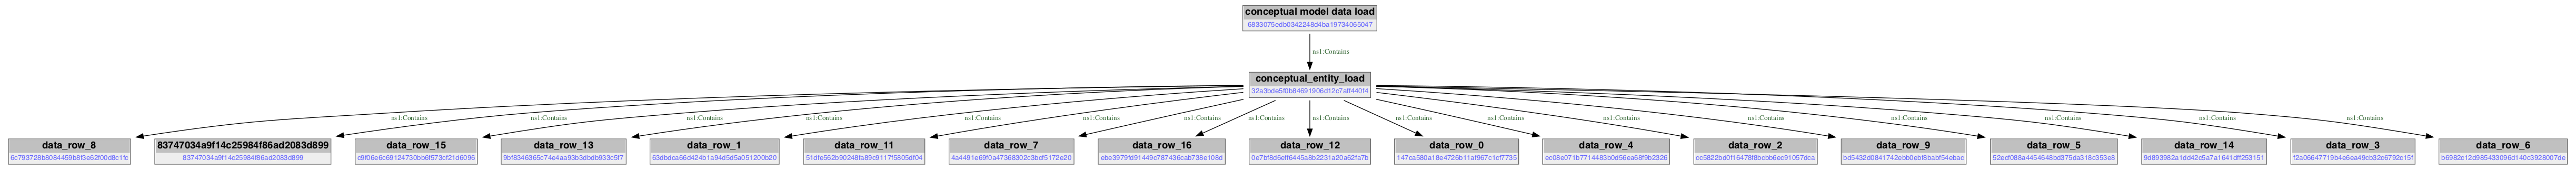

In [10]:
visualize(t2rdflibg(test.query(data_load_objects_sparql)))

In [11]:
batch_manifest = { onto.EntityAttributeRecord : get_data_rows("model_entities_v2.csv")}
test = loader.load_data(onto, batch_manifest=batch_manifest, rdflib_graph=test, serial_key=serial_key)

[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/ab6c86a9aea541fe90c2658a6843d23a'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Attribute')]
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/ab6c86a9aea541fe90c2658a6843d23a'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('PersonID')]
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/c81e7730e97e48dbab1be2501285fcf8'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Class')]
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/c81e7730e97e48dbab1be2501285fcf8'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('Person')]
[rdflib.term.URIRef('http://www.semanticweb.org/tomk

yes True
(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/b1f674d14fd0457595555c75bb96bbed'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Contains'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/49adae8d5e1640d1a65008681e3d6bc4'))
yes True
(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/49adae8d5e1640d1a65008681e3d6bc4'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Contains'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/449f859eeddc4c969a342640412e716e'))
yes True
(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/966ecf2102a447358224cdf7d00ca887'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#UniqueIdentifier'), rdflib.term.Literal('Core.Principal Interactions.Insurance Policy.Start Date'))
yes True
(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/202

mastered reified counts 288 288
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not h

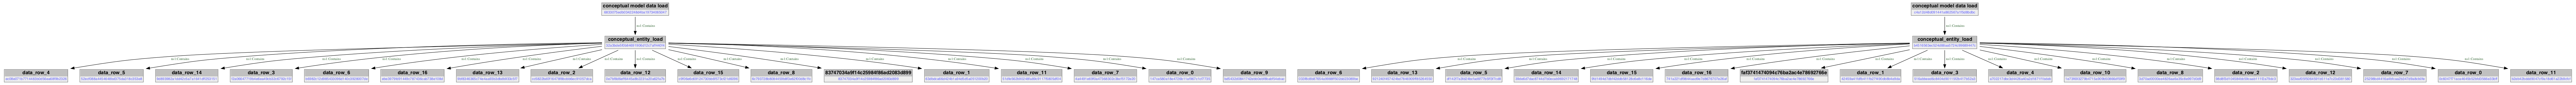

In [12]:
visualize(t2rdflibg(test.query(data_load_objects_sparql)))

In [13]:
import rdflib

(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/d789508afa054681a6abfaa36024caf8'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#ModelType'), rdflib.term.Literal('Conceptual'))



(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/d789508afa054681a6abfaa36024caf8'),
 rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#ModelType'),
 rdflib.term.Literal('Conceptual'))

In [14]:
n3_term='http://www.semanticweb.org/tomk/ontologies/2022/9/d789508afa054681a6abfaa36024caf8'
rdflib.term.URIRef(n3_term).n3()


'<http://www.semanticweb.org/tomk/ontologies/2022/9/d789508afa054681a6abfaa36024caf8>'

In [15]:
n3_term = rdflib.term.Literal('Conceptual').n3()
rdflib.term._is_valid_uri(n3_term)
import discourse


In [16]:
lf = discourse.triple_to_longform((rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/d789508afa054681a6abfaa36024caf8'),
 rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#ModelType'),
 rdflib.term.Literal('Conceptual')))


lf

'<http://www.semanticweb.org/tomk/ontologies/2022/9/d789508afa054681a6abfaa36024caf8> <http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#ModelType> "Conceptual"'

In [17]:
discourse.longform_to_triple(lf)

(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/d789508afa054681a6abfaa36024caf8'),
 rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#ModelType'),
 rdflib.term.Literal('Conceptual'))

In [18]:

#owlr.DeductiveClosure(onto).expand(row_g)
#visualize(t2rdflibg(row_g.query(q)))

df = pd.DataFrame(test.query(retrieve_reconciliation_sparql), columns=["b","j","r","f","s","p","o", "sl", "ol"])

df['key'] = df.apply(lambda x : str(x['sl']) + "." + str(x["p"]).split("#")[1] + "." + str(x['ol']), axis=1)
#df.sort_values(by="key")[["j", "r", "s","p","o"]].values

# Reconciling an arbitrarily complex object - Look for rows where the count != 2
# The things being reconciled here are facts/triples - so it's 100% coverage
rec_df = df.pivot_table(index="key", columns=["b"], aggfunc=len,margins=True)["f"].fillna(0).iloc[0:-1]
# If the older side has zero contents, and the newer side contains content, then it's an add.
# Conversely, a delete is signified.
# Processing this 
rec_df[rec_df['All']!=2]
#rec_df

b,6833075edb0342248d4ba19734065047,All
key,,
Core.Contains.Core.Principal Interactions,1,1
Core.Principal Interactions.Address.Contains.Core.Principal Interactions.Address.Address Line 1,1,1
Core.Principal Interactions.Contains.Core.Principal Interactions.Person,1,1
Core.Principal Interactions.Insurance Policy.Contains.Core.Principal Interactions.Insurance Policy.Policy ID,1,1
Core.Principal Interactions.Insurance Product.Contains.Core.Principal Interactions.Insurance Product.Coverage Type,1,1
Core.Principal Interactions.Person.Contains.Core.Principal Interactions.Person.PersonID,1,1


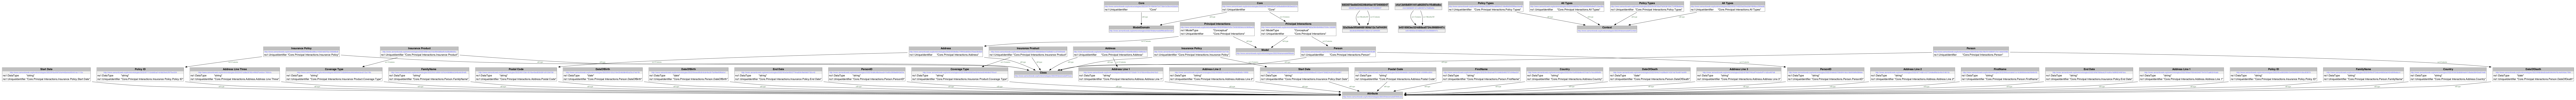

In [19]:
q = """
SELECT ?s ?p ?o
WHERE 

{
    {
        ?r dm:FactPredicate ?p .
        ?r dm:FactSubject ?s .
        ?r dm:FactObject ?o .
    }
    UNION
    {
        ?s a dm:BatchNode .
        ?s dm:Contains ?o .
        BIND (dm:Contains as ?p)
    }
    UNION
    {
        ?s a dm:BatchNode .
        BIND (dm:MemberOf as ?p)
        ?o ?p ?s .
    }
    
    
}
"""
#owlr.DeductiveClosure(onto).expand(row_g)
visualize(t2rdflibg(test.query(q)))


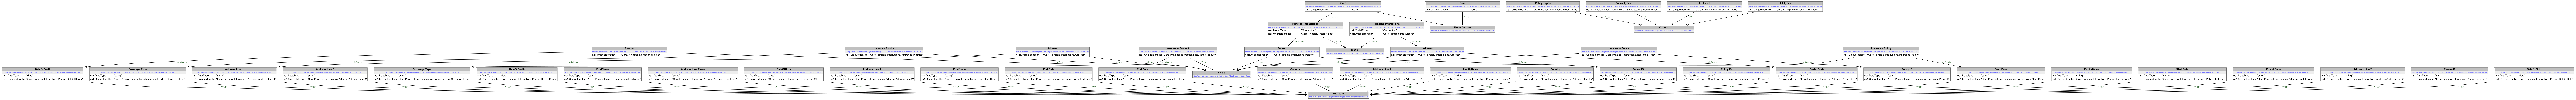

In [20]:
visualize(t2rdflibg(test.query(retrieve_facts_sparql)))

## To Do Next
### 23rd November 2022

1. Add additional attachment details at load time - things like load-names/tags
2. Find and/or create a more fleshed out data model to be serialized
3. Test data model relations. 
4. Confirm auditing/change identification for a 'diff' function
5. xxx

In [21]:
batch_manifest = { onto.EntityAttributeRecord : get_data_rows("sample/db_entities.csv")}
test = loader.load_data(onto, batch_manifest=batch_manifest, rdflib_graph=test, serial_key=serial_key)

[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/6137b54ceb6e4dc8bf25e7af9dec9cb9'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Attribute')]
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/6137b54ceb6e4dc8bf25e7af9dec9cb9'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('function_code')]
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/4c40b530763940079cca50a8cbc83322'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Class')]
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/4c40b530763940079cca50a8cbc83322'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('function')]
[rdflib.term.URIRef('http://www.semanticweb.o

yes True
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/b3f4a47486a642319135e31db088483c'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Class')]
yes True
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/b3f4a47486a642319135e31db088483c'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('staff_position')]
yes True
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/d2cc72edeeb941a1b080e77c498e12c7'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Model')]
yes True
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/d2cc72edeeb941a1b080e77c498e12c7'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('Sample Database')]
yes T

mastered reified counts 340 340
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not here
not h

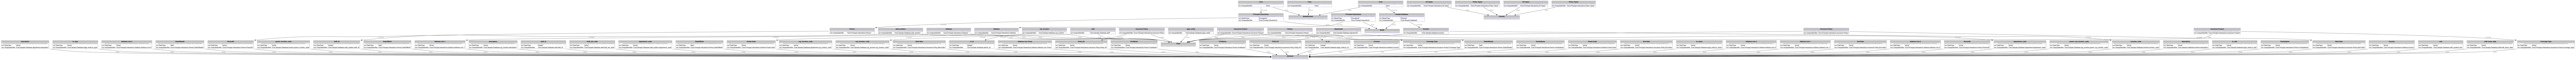

In [22]:
visualize(t2rdflibg(test.query(retrieve_facts_sparql)))

In [23]:

#owlr.DeductiveClosure(onto).expand(row_g)
#visualize(t2rdflibg(row_g.query(q)))

df = pd.DataFrame(test.query(retrieve_reconciliation_sparql), columns=["b","j","r","f","s","p","o", "sl", "ol"])
df['pl'] = df.apply(lambda x : str(x["p"]).split("#")[1], axis=1)
df['key'] = df.apply(lambda x : str(x['sl']) + "." + str(x["p"]).split("#")[1] + "." + str(x['ol']), axis=1)
#df.sort_values(by="key")[["j", "r", "s","p","o"]].values

# Reconciling an arbitrarily complex object - Look for rows where the count != 2
# The things being reconciled here are facts/triples - so it's 100% coverage
rec_df = df.pivot_table(index="key", columns=["b"], aggfunc=len,margins=True)["f"].fillna(0).iloc[0:-1]
# If the older side has zero contents, and the newer side contains content, then it's an add.
# Conversely, a delete is signified.
# Processing this 
rec_df[rec_df['All']!=2]
rec_df

b,6833075edb0342248d4ba19734065047,f9ee185e0d6f4f199da312a8688d545b,All
key,,,
Core.Contains.Core.Principal Interactions,1.0,0.0,1
Core.Contains.Core.Sample Database,0.0,1.0,1
Core.Principal Interactions.Address.Contains.Core.Principal Interactions.Address.Address Line 1,1.0,0.0,1
Core.Principal Interactions.Contains.Core.Principal Interactions.Person,1.0,0.0,1
Core.Principal Interactions.Insurance Policy.Contains.Core.Principal Interactions.Insurance Policy.Policy ID,1.0,0.0,1
Core.Principal Interactions.Insurance Product.Contains.Core.Principal Interactions.Insurance Product.Coverage Type,1.0,0.0,1
Core.Principal Interactions.Person.Contains.Core.Principal Interactions.Person.PersonID,1.0,0.0,1
Core.Sample Database.Contains.Core.Sample Database.function,0.0,1.0,1
Core.Sample Database.department.Contains.Core.Sample Database.department.department_code,0.0,1.0,1


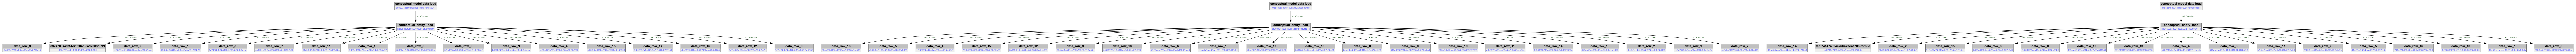

In [24]:
visualize(t2rdflibg(test.query(data_load_objects_sparql)))

In [25]:
Counter(df['b']), Counter(df['j']), Counter(df['r']), Counter(df['f'])

(Counter({rdflib.term.URIRef('f9ee185e0d6f4f199da312a8688d545b'): 8,
          rdflib.term.URIRef('6833075edb0342248d4ba19734065047'): 6}),
 Counter({rdflib.term.URIRef('8a3634514288496cb6be6fe13d0fe24e'): 8,
          rdflib.term.URIRef('32a3bde5f0b84691906d12c7aff440f4'): 6}),
 Counter({rdflib.term.URIRef('e8c367f1899e4e85af647d2356d4e7b4'): 1,
          rdflib.term.URIRef('ee8aba5f0f72463e85e739c3c4ffa948'): 1,
          rdflib.term.URIRef('04e3cd14816a4702b25fb9fd37f5c5db'): 1,
          rdflib.term.URIRef('3e866393748a479fb98dc6eb4977862e'): 1,
          rdflib.term.URIRef('b3bb137a19b042d2916688523bc25c50'): 1,
          rdflib.term.URIRef('d48e4268781b4cd0b7336a3eb70acba4'): 3,
          rdflib.term.URIRef('52ecf088a4454648bd375da318c353e8'): 1,
          rdflib.term.URIRef('147ca580a18e4726b11af967c1cf7735'): 3,
          rdflib.term.URIRef('0e7bf8d6eff6445a8b2231a20a62fa7b'): 1,
          rdflib.term.URIRef('51dfe562b90248fa89c9117f5805df04'): 1}),
 Counter({rdflib.term.URIRef

In [26]:
df[['j', 'r', 'f', 'sl', 'pl', 'ol', 'key']].sort_values(by=['key', 'j', 'r'])[15:25]

,j,r,f,sl,pl,ol,key
